<a href="https://colab.research.google.com/github/DonDiego7/Deliverable_9/blob/main/Deliverable__9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem: Linear Regression

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/boston_housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [148]:
features_names = df.columns.to_list()[:-9]
X = df[features_names] # features
Y = df['RM'] # response or target variable

In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [150]:
from sklearn.linear_model import LinearRegression

In [151]:
my_linear_regression = LinearRegression()
my_linear_regression.fit(X_train, Y_train) 

LinearRegression()

In [152]:
pred = my_linear_regression.predict(X_test)
pred

array([6.46531801, 6.00509763, 6.42203375, 5.9820066 , 6.1198838 ,
       6.33359194, 5.99572332, 6.42619973, 6.26837066, 6.31102241,
       5.80127241, 5.97022548, 6.0723961 , 5.98710729, 6.24672049,
       6.84303889, 5.96562031, 6.92367115, 6.46321744, 6.39101685,
       6.33819874, 5.96470087, 6.31136973, 6.56208159, 6.3310711 ,
       5.98983009, 6.33279242, 6.10394902, 6.46947892, 6.2746984 ,
       5.99267433, 6.0564953 , 6.47623272, 6.55009434, 6.46312797,
       6.37569717, 5.98113679, 6.30813061, 5.98323144, 5.99070171,
       6.08188689, 6.33101081, 6.46539559, 5.98478435, 6.54264791,
       6.33696713, 6.08167912, 6.38687688, 6.10170489, 6.31130749,
       6.37932777, 6.30578843, 6.38365156, 6.47561926, 5.89903819,
       6.40440035, 6.54288664, 6.41596473, 5.83824145, 6.50477538,
       6.8143842 , 6.27605803, 6.53376653, 6.38399045, 5.96483574,
       6.6867112 , 6.06133558, 6.40393373, 5.96884603, 6.22459991,
       6.11972339, 6.11974621, 6.85622667, 6.75318226, 5.96603

In [153]:
import matplotlib.pyplot as plt

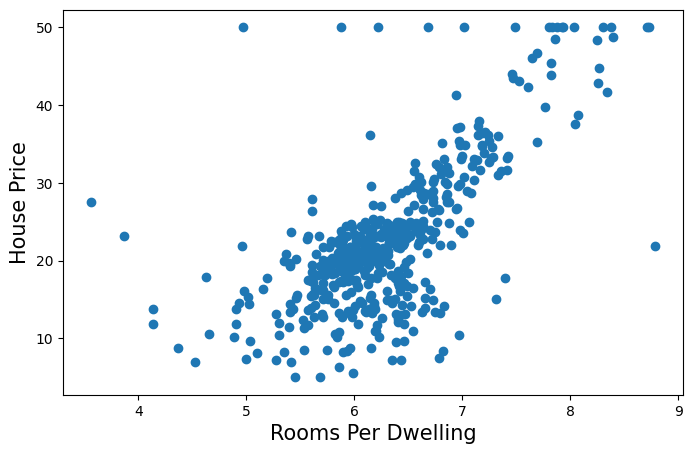

In [154]:
plt.figure(figsize = (8, 5))
plt.scatter(x = df['RM'], y = df['MEDV'], color = 'Tab:blue')
plt.xlabel('Rooms Per Dwelling', fontsize = 15)
plt.ylabel('House Price', fontsize = 15)
plt.show()

As we can see housing prices go up significantly past 6 rooms. More rooms can indicate higher housing prices.

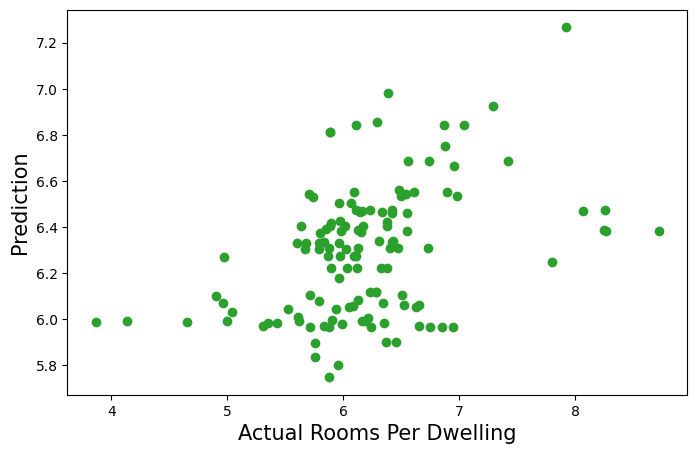

In [155]:
plt.figure(figsize = (8, 5))
plt.scatter(x = Y_test, y = pred, color = 'Tab:green')
plt.xlabel('Actual Rooms Per Dwelling', fontsize = 15)
plt.ylabel('Prediction', fontsize = 15)
plt.show()

In [156]:
print('The model r2 score is: {}'.format(my_linear_regression.score(X_train, Y_train)))

The model r2 score is: 0.1901715542762692


After creating a linear regression we can see that using rooms per dwelling is not a good predictor of home value.

In [157]:
print('The intercept (b_0) is  {}'.format(my_linear_regression.intercept_))
for i in range(len(features_names)):
  print('The coef (b_{}) is  {}'.format(i+1, my_linear_regression.coef_[i]))

The intercept (b_0) is  6.338433915913703
The coef (b_1) is  -0.0035589503864096447
The coef (b_2) is  0.005345465353943833
The coef (b_3) is  -0.03477403698258108
The coef (b_4) is  0.2803108568305116
The coef (b_5) is  0.5212853849106063


In [158]:
def MAPE(Y, pred): # MAPE: Mean Abs Percentage Error
  l1 = list(Y)
  l2 = list(pred)
  er = []
  for i in range(len(l1)):
    e = np.abs(l1[i]-l2[i])
    er.append(e/l1[i])
  return np.mean(er)

In [159]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('MAPE:', MAPE(Y_test, pred)*100, "%")

Mean Absolute Error: 0.47455914320498593
Mean Squared Error: 0.44536847440823457
Root Mean Squared Error: 0.6673593293033631
MAPE: 7.878474750514652 %


While the scatter plot shows that there could be a cooeralation better the price of houses and the number of rooms per dwelling, the linear regression model tells a different story. This is because there are several other factors such as location, age, condition, etc.
